In [1]:
from tkinter import *
from PIL import Image
import io
import os
import subprocess
import numpy as np
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
import pickle

In [2]:
model_conv = tf.keras.models.load_model('model_conv.h5')
model_log = pickle.load(open('model_log.pkl','rb'))

In [24]:
image = Image.open('chiffre.jpeg').convert('L')
print(type(image))
new_image = image.resize((28, 28 ))
#traitement image
ch = np.array(new_image)
ch = ch*-1
ch = ch+ 255

img_log = ch.reshape(28*28)
model_log.predict(img_log.reshape(1, -1))[0]

<class 'PIL.Image.Image'>


3

In [23]:
img

0

In [3]:
# 
Fenetre = Tk()

canvas = Canvas(Fenetre,width=140,height=140,bg="white",bd=8)
canvas.pack() 
x = None
y = None
 
def ecrire(event):
    x = event.x
    y = event.y
    
    if x and y:
        canvas.create_line(x,y,event.x,event.y,width=12,fill='black',capstyle=ROUND,smooth=1)
        
        
def save_as_png():
    ps = canvas.postscript(colormode='color')
    print(type(ps),'tt')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    print(type(img))
    img.save('chiffre.jpeg', 'jpeg') 

    
def predire():
    #on charge image
    save_as_png()
    
    image = Image.open('chiffre.jpeg').convert('L')
    print(type(image))
    new_image = image.resize((28, 28 ))
    #traitement image
    ch = np.array(new_image)
    ch = ch*-1
    ch = ch+ 255
    
    img_log = ch.reshape(28*28)

    img = np.array(ch)
    img = np.resize(img, (28,28,1))
    img = img.reshape(1,28,28,1)
    img = img/255.
    #
    res = str(model_conv.predict_classes(img)[0]) 
    res_log = str(model_log.predict(img_log.reshape(1, -1))[0])

    t1s = str("Modèle convolutif: " + res)
    t2s = str("Modèle logistique: " + res_log)
    t1.set(t1s)
    t2.set(t2s)


def eff():
    canvas.delete("all")
    
    
canvas.pack(expand=YES , fill=BOTH)
canvas.bind('<B1-Motion>' , ecrire)

#b = Button(Fenetre, text="Sauver", command=save_as_png)
#b.pack()

a = Button(Fenetre, text="Predire", command=predire)
a.pack()

c = Button(Fenetre, text="Effacer", command=eff)
c.pack()

t1 = StringVar()
t2 = StringVar()
texteLabel = Label(Fenetre, textvariable = t1)
texteLabel2 = Label(Fenetre, textvariable = t2)
texteLabel.pack()
texteLabel2.pack()

Fenetre.mainloop()



<class 'str'> tt
<class 'PIL.EpsImagePlugin.EpsImageFile'>
<class 'PIL.Image.Image'>
<class 'str'> tt
<class 'PIL.EpsImagePlugin.EpsImageFile'>
<class 'PIL.Image.Image'>
<class 'str'> tt
<class 'PIL.EpsImagePlugin.EpsImageFile'>
<class 'PIL.Image.Image'>
<class 'str'> tt
<class 'PIL.EpsImagePlugin.EpsImageFile'>
<class 'PIL.Image.Image'>
<class 'str'> tt
<class 'PIL.EpsImagePlugin.EpsImageFile'>
<class 'PIL.Image.Image'>
<class 'str'> tt
<class 'PIL.EpsImagePlugin.EpsImageFile'>
<class 'PIL.Image.Image'>
<class 'str'> tt
<class 'PIL.EpsImagePlugin.EpsImageFile'>
<class 'PIL.Image.Image'>
<class 'str'> tt
<class 'PIL.EpsImagePlugin.EpsImageFile'>
<class 'PIL.Image.Image'>
<class 'str'> tt
<class 'PIL.EpsImagePlugin.EpsImageFile'>
<class 'PIL.Image.Image'>


In [44]:
#tests

In [8]:
image = Image.open('chiffre.jpeg').convert('L')
new_image = image.resize((28, 28 ))

In [9]:
new_image

In [10]:
ch = np.array(new_image)
ch = ch*-1
ch = ch+ 255

In [11]:
ch[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int16)

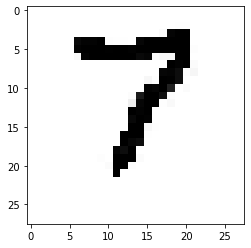

In [12]:
pyplot.imshow(ch , cmap='Greys')
pyplot.show()

In [50]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [51]:
l_n = []
for i,val in enumerate(y_train):
    if val == 2:
        l_n.append(i)

In [52]:
l_n[:10]

[5, 16, 25, 28, 76, 82, 109, 117, 120, 122]

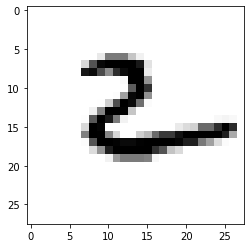

In [53]:
pyplot.imshow(x_train[109] , cmap='Greys')
pyplot.show()

In [54]:
#ch = x_train[4]

In [55]:
img = np.array(ch)
img = np.resize(img, (28,28,1))
img = img.reshape(1,28,28,1)
img = img/255.

In [56]:
print(str(model.predict_classes(img)[0]))

7
